In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
# assigns arrays of random floats to variables
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)

# zip funtion combines the two new arrays into an object in memory
# each lat and lng with the same index in their own array, are paired into a tuple in the new zipped array
# in lat_lngs, the lat is index 0 and lng index 1 in each tuple.  each tuple is a full coordinate
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Assinging the zipped array to a list
# you can only unzip a zipped tuple once before it's removed from memory
coordinates = list(lat_lngs)

In [4]:
#import citipy
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count.
len(cities)

619

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
# Unmodified, This will return an error because there is nothing to indicate location
# will add cities soon
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [9]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters to track progress.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
# enumerate method is a shortcut for referencing by each city's index but returning the city name
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        
    # Adds city name to our base URL by creating an endpoint URL with each city. 
    # the .replace removes empty space and concatenates if the city name has a space 
    # otherwise it would find weather data for Cabo instead of Cabo San Lucas
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    # this will run through each city and make an api call based on the city_url created above
    #try except blocks lets the code continue even if an error occurs
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city. 
    except:
        print("City not found. Skipping...")
        #general purpose statement to handle all errors eincounter and continue the program
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | nizhniy kuranakh
Processing Record 2 of Set 1 | bredasdorp
Processing Record 3 of Set 1 | busselton
Processing Record 4 of Set 1 | pevek
Processing Record 5 of Set 1 | syracuse
Processing Record 6 of Set 1 | chokurdakh
Processing Record 7 of Set 1 | pasighat
Processing Record 8 of Set 1 | martapura
Processing Record 9 of Set 1 | hermanus
Processing Record 10 of Set 1 | mehamn
Processing Record 11 of Set 1 | cap-aux-meules
Processing Record 12 of Set 1 | barrow
Processing Record 13 of Set 1 | tasiilaq
Processing Record 14 of Set 1 | rikitea
Processing Record 15 of Set 1 | ilinsko-podomskoye
City not found. Skipping...
Processing Record 16 of Set 1 | sabha
Processing Record 17 of Set 1 | lolua
City not found. Skipping...
Processing Record 18 of Set 1 | ponta do sol
Processing Record 19 of Set 1 | mataura
Processing Record 20 of Set 1 | roros
Processing Record 21 of Set 1 | rawson
Processing Record 

Processing Record 43 of Set 4 | beni mazar
Processing Record 44 of Set 4 | erenhot
Processing Record 45 of Set 4 | general elizardo aquino
Processing Record 46 of Set 4 | la palma
Processing Record 47 of Set 4 | sioux lookout
Processing Record 48 of Set 4 | chipinge
Processing Record 49 of Set 4 | klaksvik
Processing Record 50 of Set 4 | port hardy
Processing Record 1 of Set 5 | kushmurun
Processing Record 2 of Set 5 | khandagayty
Processing Record 3 of Set 5 | arraial do cabo
Processing Record 4 of Set 5 | ornskoldsvik
Processing Record 5 of Set 5 | geraldton
Processing Record 6 of Set 5 | bombay
Processing Record 7 of Set 5 | hasaki
Processing Record 8 of Set 5 | babu
Processing Record 9 of Set 5 | nanortalik
Processing Record 10 of Set 5 | barentsburg
City not found. Skipping...
Processing Record 11 of Set 5 | asfi
Processing Record 12 of Set 5 | farah
Processing Record 13 of Set 5 | whitehorse
Processing Record 14 of Set 5 | panzhihua
Processing Record 15 of Set 5 | botro
Processin

Processing Record 31 of Set 8 | aklavik
Processing Record 32 of Set 8 | almenara
Processing Record 33 of Set 8 | rio grande
Processing Record 34 of Set 8 | vaitupu
City not found. Skipping...
Processing Record 35 of Set 8 | muros
Processing Record 36 of Set 8 | alberton
Processing Record 37 of Set 8 | micheweni
Processing Record 38 of Set 8 | vanimo
Processing Record 39 of Set 8 | jardim
Processing Record 40 of Set 8 | kuva
City not found. Skipping...
Processing Record 41 of Set 8 | port antonio
Processing Record 42 of Set 8 | fairbanks
Processing Record 43 of Set 8 | buta
Processing Record 44 of Set 8 | pretoria
Processing Record 45 of Set 8 | luderitz
Processing Record 46 of Set 8 | qandala
Processing Record 47 of Set 8 | aitape
Processing Record 48 of Set 8 | doctor pedro p. pena
City not found. Skipping...
Processing Record 49 of Set 8 | karamay
City not found. Skipping...
Processing Record 50 of Set 8 | izhma
Processing Record 1 of Set 9 | kota
Processing Record 2 of Set 9 | ilo
P

Processing Record 18 of Set 12 | ixtapa
Processing Record 19 of Set 12 | pisco
Processing Record 20 of Set 12 | kendari
Processing Record 21 of Set 12 | deli tua
Processing Record 22 of Set 12 | yanagawa
Processing Record 23 of Set 12 | kuala terengganu
Processing Record 24 of Set 12 | aksu
Processing Record 25 of Set 12 | talnakh
Processing Record 26 of Set 12 | zaranj
Processing Record 27 of Set 12 | provost
Processing Record 28 of Set 12 | roald
Processing Record 29 of Set 12 | hami
Processing Record 30 of Set 12 | kieta
Processing Record 31 of Set 12 | ipanema
Processing Record 32 of Set 12 | evanton
Processing Record 33 of Set 12 | shangqiu
Processing Record 34 of Set 12 | coolum beach
Processing Record 35 of Set 12 | ganzhou
Processing Record 36 of Set 12 | tyup
Processing Record 37 of Set 12 | tutoia
Processing Record 38 of Set 12 | novokuznetsk
Processing Record 39 of Set 12 | goure
Processing Record 40 of Set 12 | barabai
Processing Record 41 of Set 12 | muroto
Processing Reco

In [11]:
len(city_data)

574

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Nizhniy Kuranakh,58.84,125.49,38.59,79,0,1.77,RU,2020-08-27 21:02:33
1,Bredasdorp,-34.53,20.04,55.40,87,46,5.82,ZA,2020-08-27 20:58:43
2,Busselton,-33.65,115.33,46.00,84,0,5.08,AU,2020-08-27 20:58:29
3,Pevek,69.70,170.31,38.80,90,0,2.82,RU,2020-08-27 21:02:34
4,Syracuse,37.09,15.28,81.00,83,3,2.24,IT,2020-08-27 21:02:34
5,Chokurdakh,70.63,147.92,37.53,85,100,8.43,RU,2020-08-27 21:02:34
6,Pasighat,28.07,95.33,76.03,83,3,2.82,IN,2020-08-27 21:02:34
7,Martapura,-3.42,114.85,73.40,94,40,1.12,ID,2020-08-27 20:59:49
8,Hermanus,-34.42,19.23,54.00,92,71,7.00,ZA,2020-08-27 20:59:33
9,Mehamn,71.04,27.85,44.60,75,40,16.11,NO,2020-08-27 21:02:34


In [13]:
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']

In [14]:
city_data_df= city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Nizhniy Kuranakh,RU,2020-08-27 21:02:33,58.84,125.49,38.59,79,0,1.77
1,Bredasdorp,ZA,2020-08-27 20:58:43,-34.53,20.04,55.40,87,46,5.82
2,Busselton,AU,2020-08-27 20:58:29,-33.65,115.33,46.00,84,0,5.08
3,Pevek,RU,2020-08-27 21:02:34,69.70,170.31,38.80,90,0,2.82
4,Syracuse,IT,2020-08-27 21:02:34,37.09,15.28,81.00,83,3,2.24
...,...,...,...,...,...,...,...,...,...
569,Tilichiki,RU,2020-08-27 21:03:22,60.47,166.10,48.69,69,100,9.66
570,Uyuni,BO,2020-08-27 21:03:22,-20.46,-66.83,58.41,30,0,14.05
571,Luebo,CD,2020-08-27 21:03:22,-5.35,21.42,67.82,89,100,2.35
572,Beberibe,BR,2020-08-27 21:03:22,-4.18,-38.13,82.40,69,0,16.11


In [15]:
#added a new folder called weather_data
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
# Switching gears to plotting the data now

In [17]:
# Extract relevant fields from the DataFrame for plotting.
# indicate the relevent data column
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [19]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")

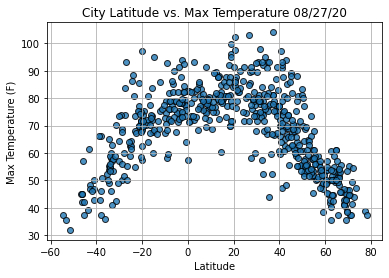

In [20]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

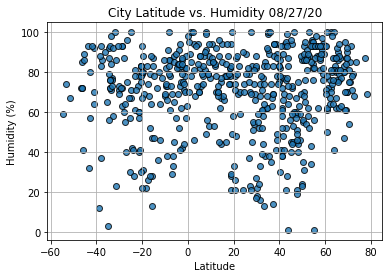

In [21]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

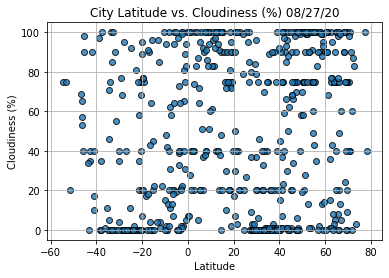

In [22]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()